First define the lattice Wigner transform according to the paper [New Journal of Physics 14 (2012) 103009]

In [13]:
import math
import numpy as np

def wigner(psi, k):
    
    ns = len(psi)
    nk = len(k)
    
    f = psi
    rho_w = np.zeros((ns, 2*ns), dtype = complex)
    
    for i in range(ns):
        for j in range(2*ns):
            if j < i:
                rho_w[i, j] = 0
                continue
                
            if j - i >= ns:
                rho_w[i, j] = 0
                continue
                
            rho_w[i, j] = f[i] * f[j - i].conj()

    w_ = np.zeros((nk, 2*ns), dtype = complex)

    for i in range(ns):
        for j in range(2*ns):
            for p in range(nk):
                w_[p, j] = w_[p, j] + rho_w[i, j] * np.exp(-1j * 2 * i * k[p])
            
    for i in range(2*ns):
        for p in range(nk):
            w_[p, i] = w_[p, i] * np.exp(1j * i * k[p])
            
    return w_

Then compute the spread:

In [9]:
n_sites = 400
e = 1
h = 0.05
es = [e]*n_sites
hs = [h]*(n_sites-1)
dt = 0.01
t = 1000
tg = np.arange(0, t + dt, dt)
ntg = tg.size

In [10]:
import lightcones
alpha = lightcones.spread(es, hs, ntg, dt) 

In [11]:
import matplotlib.pyplot as plt

Spread at $t=0$ corresponds to the quantum sitting at site $0$. So its position is well defined, and the momentum is completely uncertain:

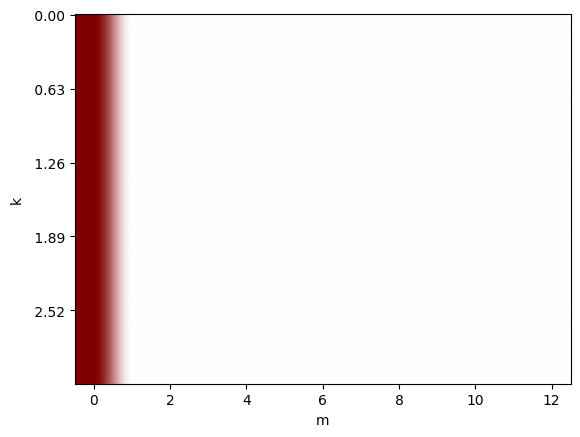

In [15]:
n_sites_cut = 200
ti = 0
psi_ = alpha[:n_sites_cut, ti]
k = np.arange(0, math.pi, 0.01)

w_p = wigner(psi_, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :25:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()

At a later time, the quantum wavepacket starts to propagate:

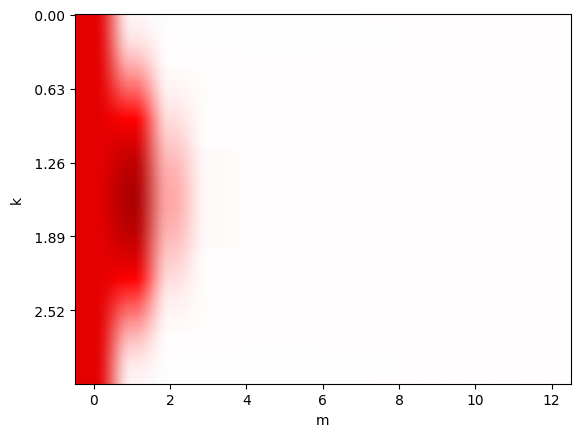

In [18]:
n_sites_cut = 200
ti = 1500
psi_ = alpha[:n_sites_cut, ti]
k = np.arange(0, math.pi, 0.01)

w_p = wigner(psi_, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :25:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()

We already observe that the middle of the band (around $k=\pi/2$) is propagating faster then the band edges ($k=0$ and $k=\pi$). At very large times we obtain that the band interior "flies away" from the site $0$, and the band edges do not:

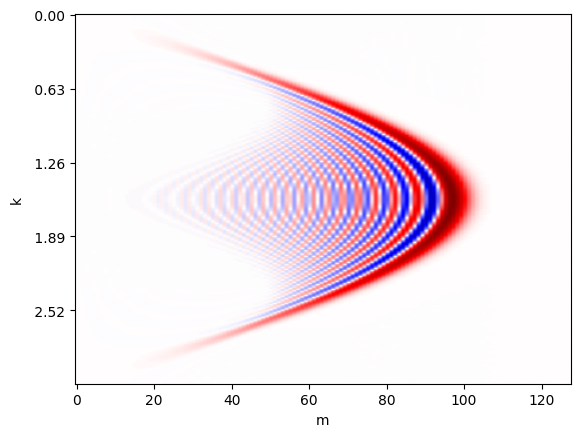

In [20]:
n_sites_cut = 200
ti = 100000
psi_ = alpha[:n_sites_cut, ti]
k = np.arange(0, math.pi, 0.01)

w_p = wigner(psi_, k)

max_ = np.max(np.abs(w_p[:]))

im = plt.imshow(w_p[:, :256:2].real, aspect='auto', cmap = 'seismic', vmin = -max_, vmax = max_)
plt.xlabel('m')
plt.ylabel('k')
plt.yticks([len(k)/5 * i for i in range(5)], labels = ["{:5.2f}".format(k[round(len(k)/5 * i)]) for i in range(5)])
plt.show()

We conjecture that the local group velocity vanishes at the band edges. Since the impurity (the open quantum system) is sitting at the site $0$, this means that the memory effects (the "non-Markovianity") are concentrated at the band edges, and the band center is the regime where the Fermi Golden rule is valid.